# Melanoma Classification Model - Support Vector Machine

## Set up

#### Set up for importing utilities

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

 #### Random State
 Please use the following random state for all methods that may take a random state in order to achieve reproducable results

In [2]:
from utilities import random_state
random_state = random_state() 

#### Export Config
You may configure 
- whether the results shall be exported (export_results)
- where the results will be exported to

The default folder "export" will not be tracked by git in order to avoid flooding the repository with w.i.p. results. If you want to save a result on github, please rename it including the type of model and the date and move the picture to another folder :)

In [3]:
export_results = True
export_folder = 'export'

date_format = "%d%m%Y%H%M%S" # timestamp format in exported files
if export_results:
    import datetime
    import os
    if not os.path.exists(export_folder): 
      os.makedirs(export_folder)
      print("Created new directory %s" %export_folder)

## Get data

#### Get image paths
You may adjust the number of images loaded in order to run models more quickly on your private computer. Note hoewever that the less images you use the worse the predictions will likely be. 

For developing models on the cluster the max_images parameter should be removed. Instead call the method get_all_img_paths(img_folder).

In [4]:
from utilities import get_img_paths

img_folder_train = "data1920/train" # change this to the folder including your images!
img_folder_test = "data1920/test"
max_images_train = 800
max_images_test = 100

img_paths_train = get_img_paths(img_folder_train, max_images_train) 
img_paths_test = get_img_paths(img_folder_test, max_images_test)

#### Load data
Loads the images specified in img_paths into a data frame. This includes resizing the images and flattening them into an array and may take a while.

In [5]:
from utilities import load_data

groundtruth_file_train = "data1920/ISIC_2020_2019_train.csv" # change this to the path where you have your data!
groundtruth_file_test = "data1920/ISIC_2020_2019_test.csv"

df_train = load_data(img_paths_train, groundtruth_file_train)
df_test = load_data(img_paths_test, groundtruth_file_test)

#### Split into target and predictors

In [6]:
from utilities import split_predictors_target

X_train, y_train = split_predictors_target(df_train) 
X_test, y_test = split_predictors_target(df_test) 

## Feature extraction, grid search and training the model
Function performing feature extraction, grid search, training and testing the model

In [7]:
from utilities import display_results
from utilities import display_interesting_results

def display_model_results(X_test, y_pred, y_test):
    # display some results
    print("Classification results")
    plt_all = display_results(X_test, y_pred, y_test, 15)

    if export_results:
        plt_all.savefig(export_folder + "/classification_results_"+datetime.datetime.now().strftime(date_format)+".png")

    plt_all.show()

    ## display interesting results
    print("Incorrect classification results")
    from utilities import display_interesting_results
    plt_wrong = display_interesting_results(X_test, y_pred, y_test)
    if export_results:
        plt_wrong.savefig(export_folder + "/incorrect_classification_results_"+datetime.datetime.now().strftime(date_format)+".png")

    plt_wrong.show()

In [8]:
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

def feature_selection_prediction(method,x_train, y_train,x_test, y_test,explained_variance=True,inverse_transform=True):
    x_train_reduced = method.fit_transform(x_train,y_train)
    
    if explained_variance:
        print(f'Method preserved information={sum(method.explained_variance_ratio_)}')
        print(f'Method loss={1-sum(method.explained_variance_ratio_)}')
    
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']} 
    model = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0)
    model.fit(x_train_reduced,y_train)
    print(f'GridSearch best params after tuning={ model.best_params_}')
    print(f'GridSearch model after tuning={model.best_estimator_}')  
    
    ## test model
    x_test_reduced = method.transform(x_test)
    y_pred = model.predict(x_test_reduced)
    
    ## print classification result
    report = classification_report(y_test, y_pred, digits=4)
    print(f'\nClassification_report=\n{report}\n')
    if export_results:
        file = open(export_folder + "/classification_report_"+datetime.datetime.now().strftime(date_format)+".txt", 'w')
        file.write(report)
        file.close()
    
    if inverse_transform:
        X_test = method.inverse_transform(x_test_reduced)
        X_test = pd.DataFrame(X_test, dtype="float", columns = ['pixel' + str(i + 1) for i in range(X_test.shape[1])])

        display_model_results(X_test,y_pred, y_test)

Testing and training of four different feature extraction methods.

Principle Component Analysis

Method preserved information=0.9121176903413337
Method loss=0.08788230965866628
GridSearch best params after tuning={'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
GridSearch model after tuning=SVC(C=0.1, gamma=0.001, kernel='poly')

Classification_report=
              precision    recall  f1-score   support

           0     0.9381    0.9785    0.9579        93
           1     0.3333    0.1429    0.2000         7

    accuracy                         0.9200       100
   macro avg     0.6357    0.5607    0.5789       100
weighted avg     0.8958    0.9200    0.9048       100


Classification results


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


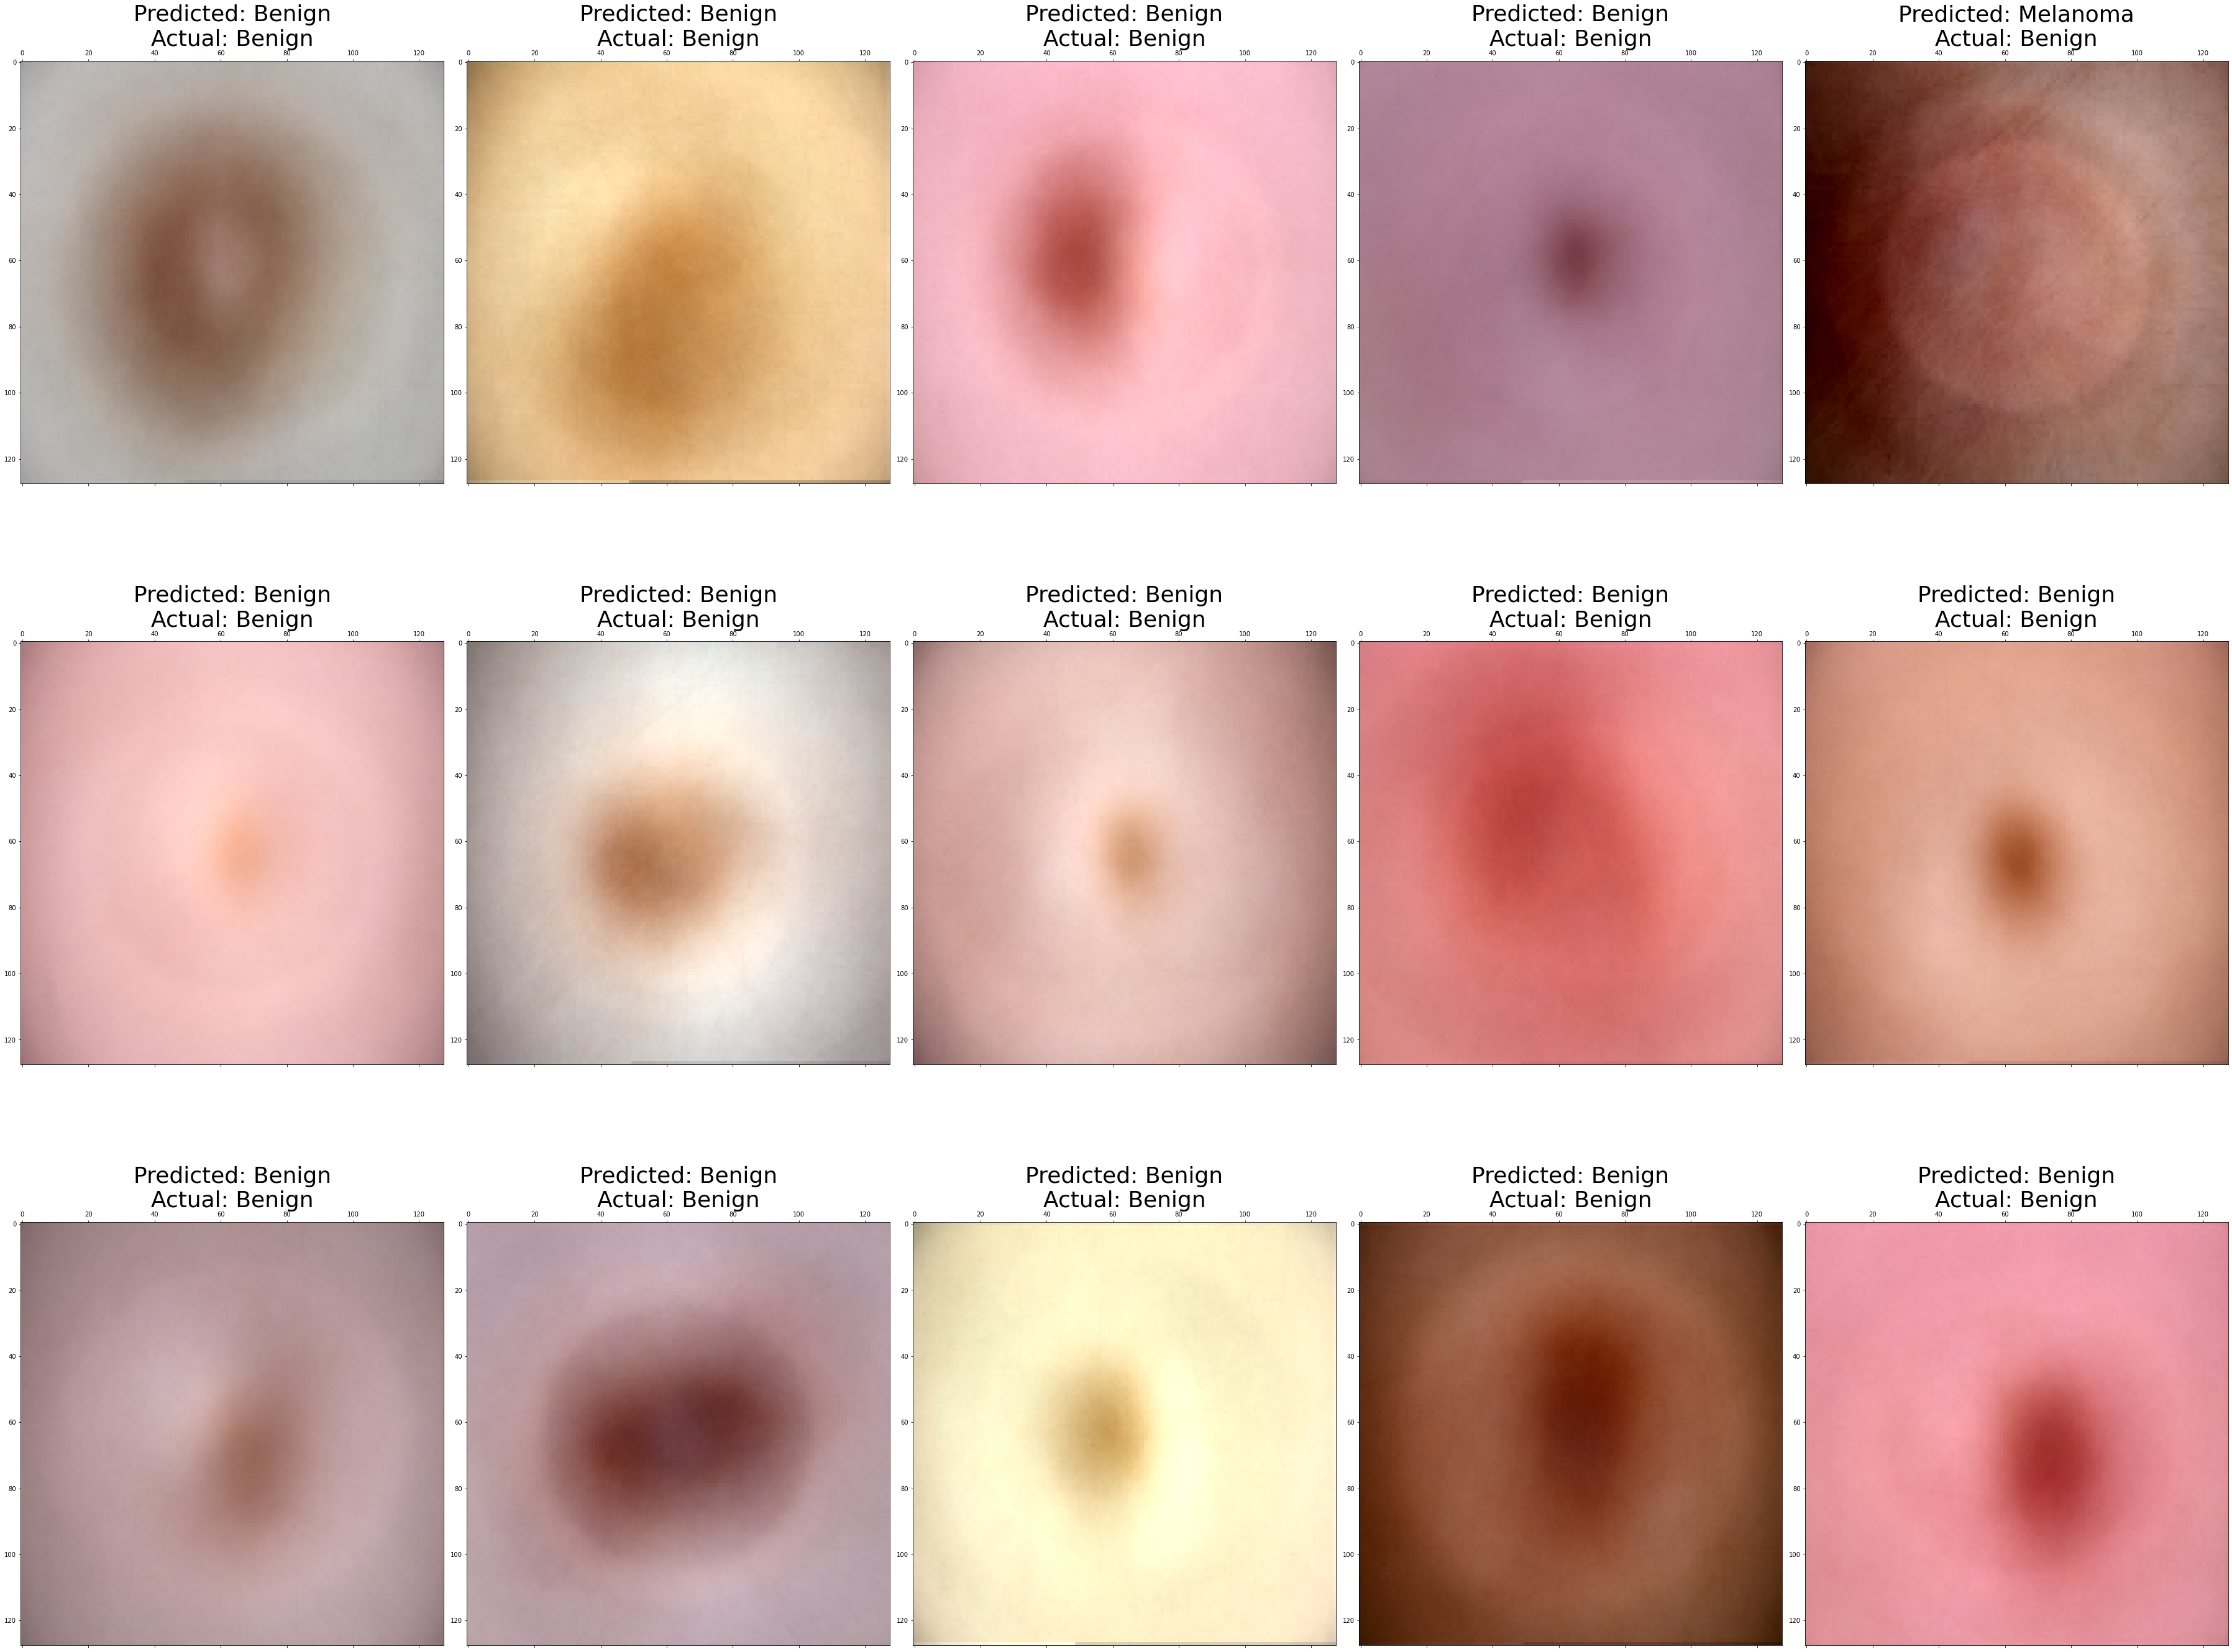

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Incorrect classification results


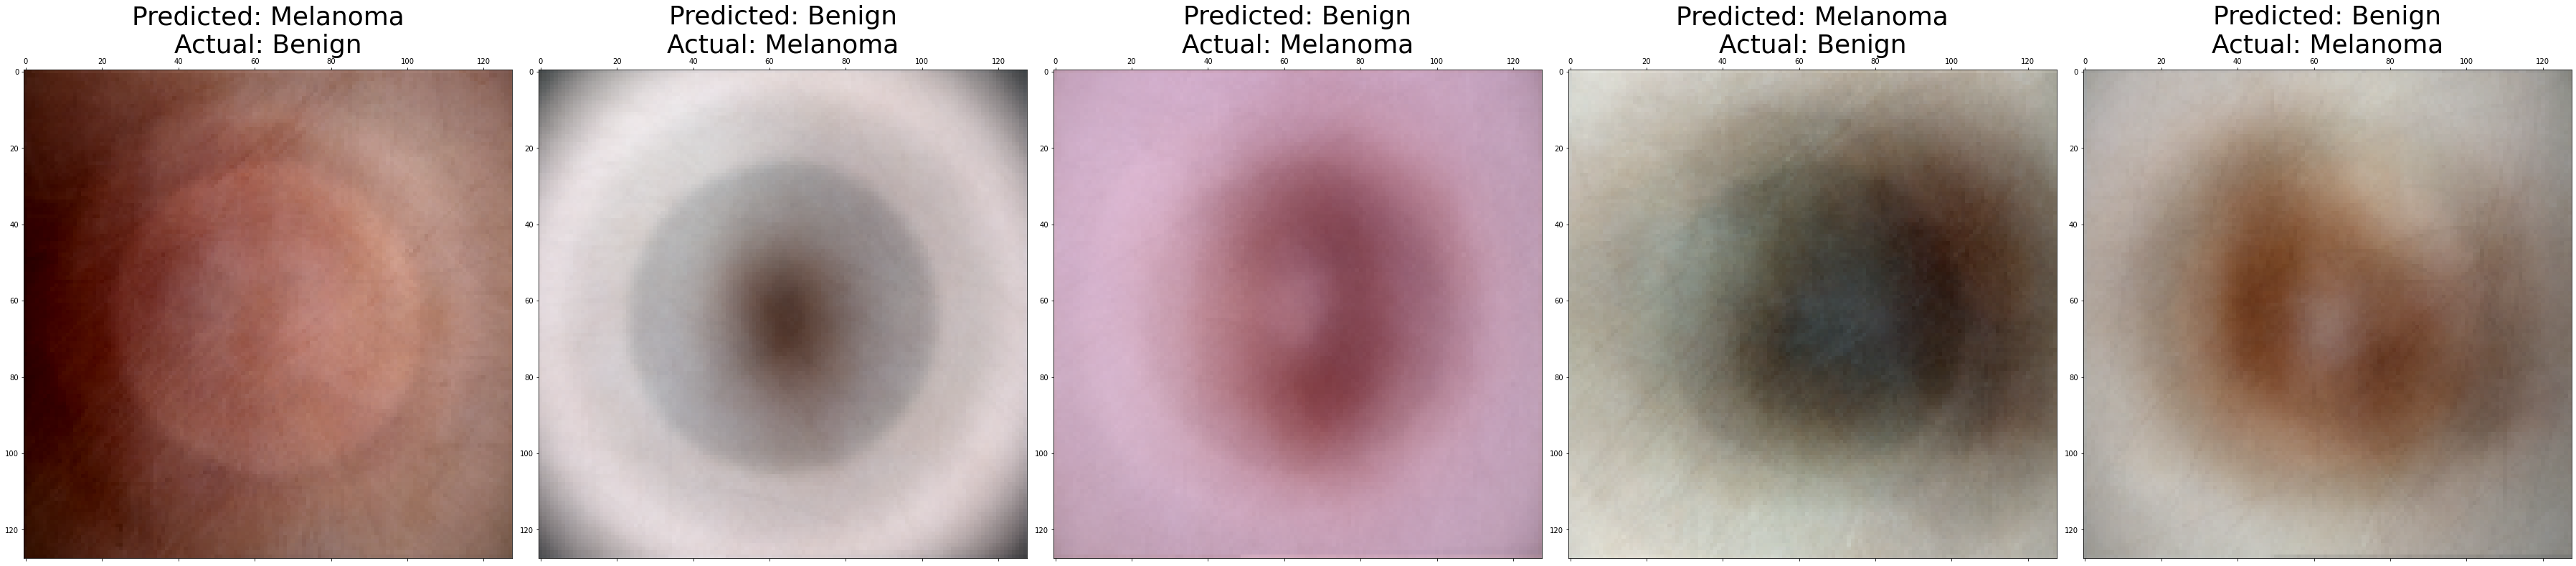

In [9]:
print("Principle Component Analysis\n")
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
feature_selection_prediction(pca, X_train, y_train,X_test, y_test)

Independent Component Analysis

GridSearch best params after tuning={'C': 100, 'gamma': 1, 'kernel': 'rbf'}
GridSearch model after tuning=SVC(C=100, gamma=1)

Classification_report=
              precision    recall  f1-score   support

           0     0.9293    0.9892    0.9583        93
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.9200       100
   macro avg     0.4646    0.4946    0.4792       100
weighted avg     0.8642    0.9200    0.8912       100


Classification results


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


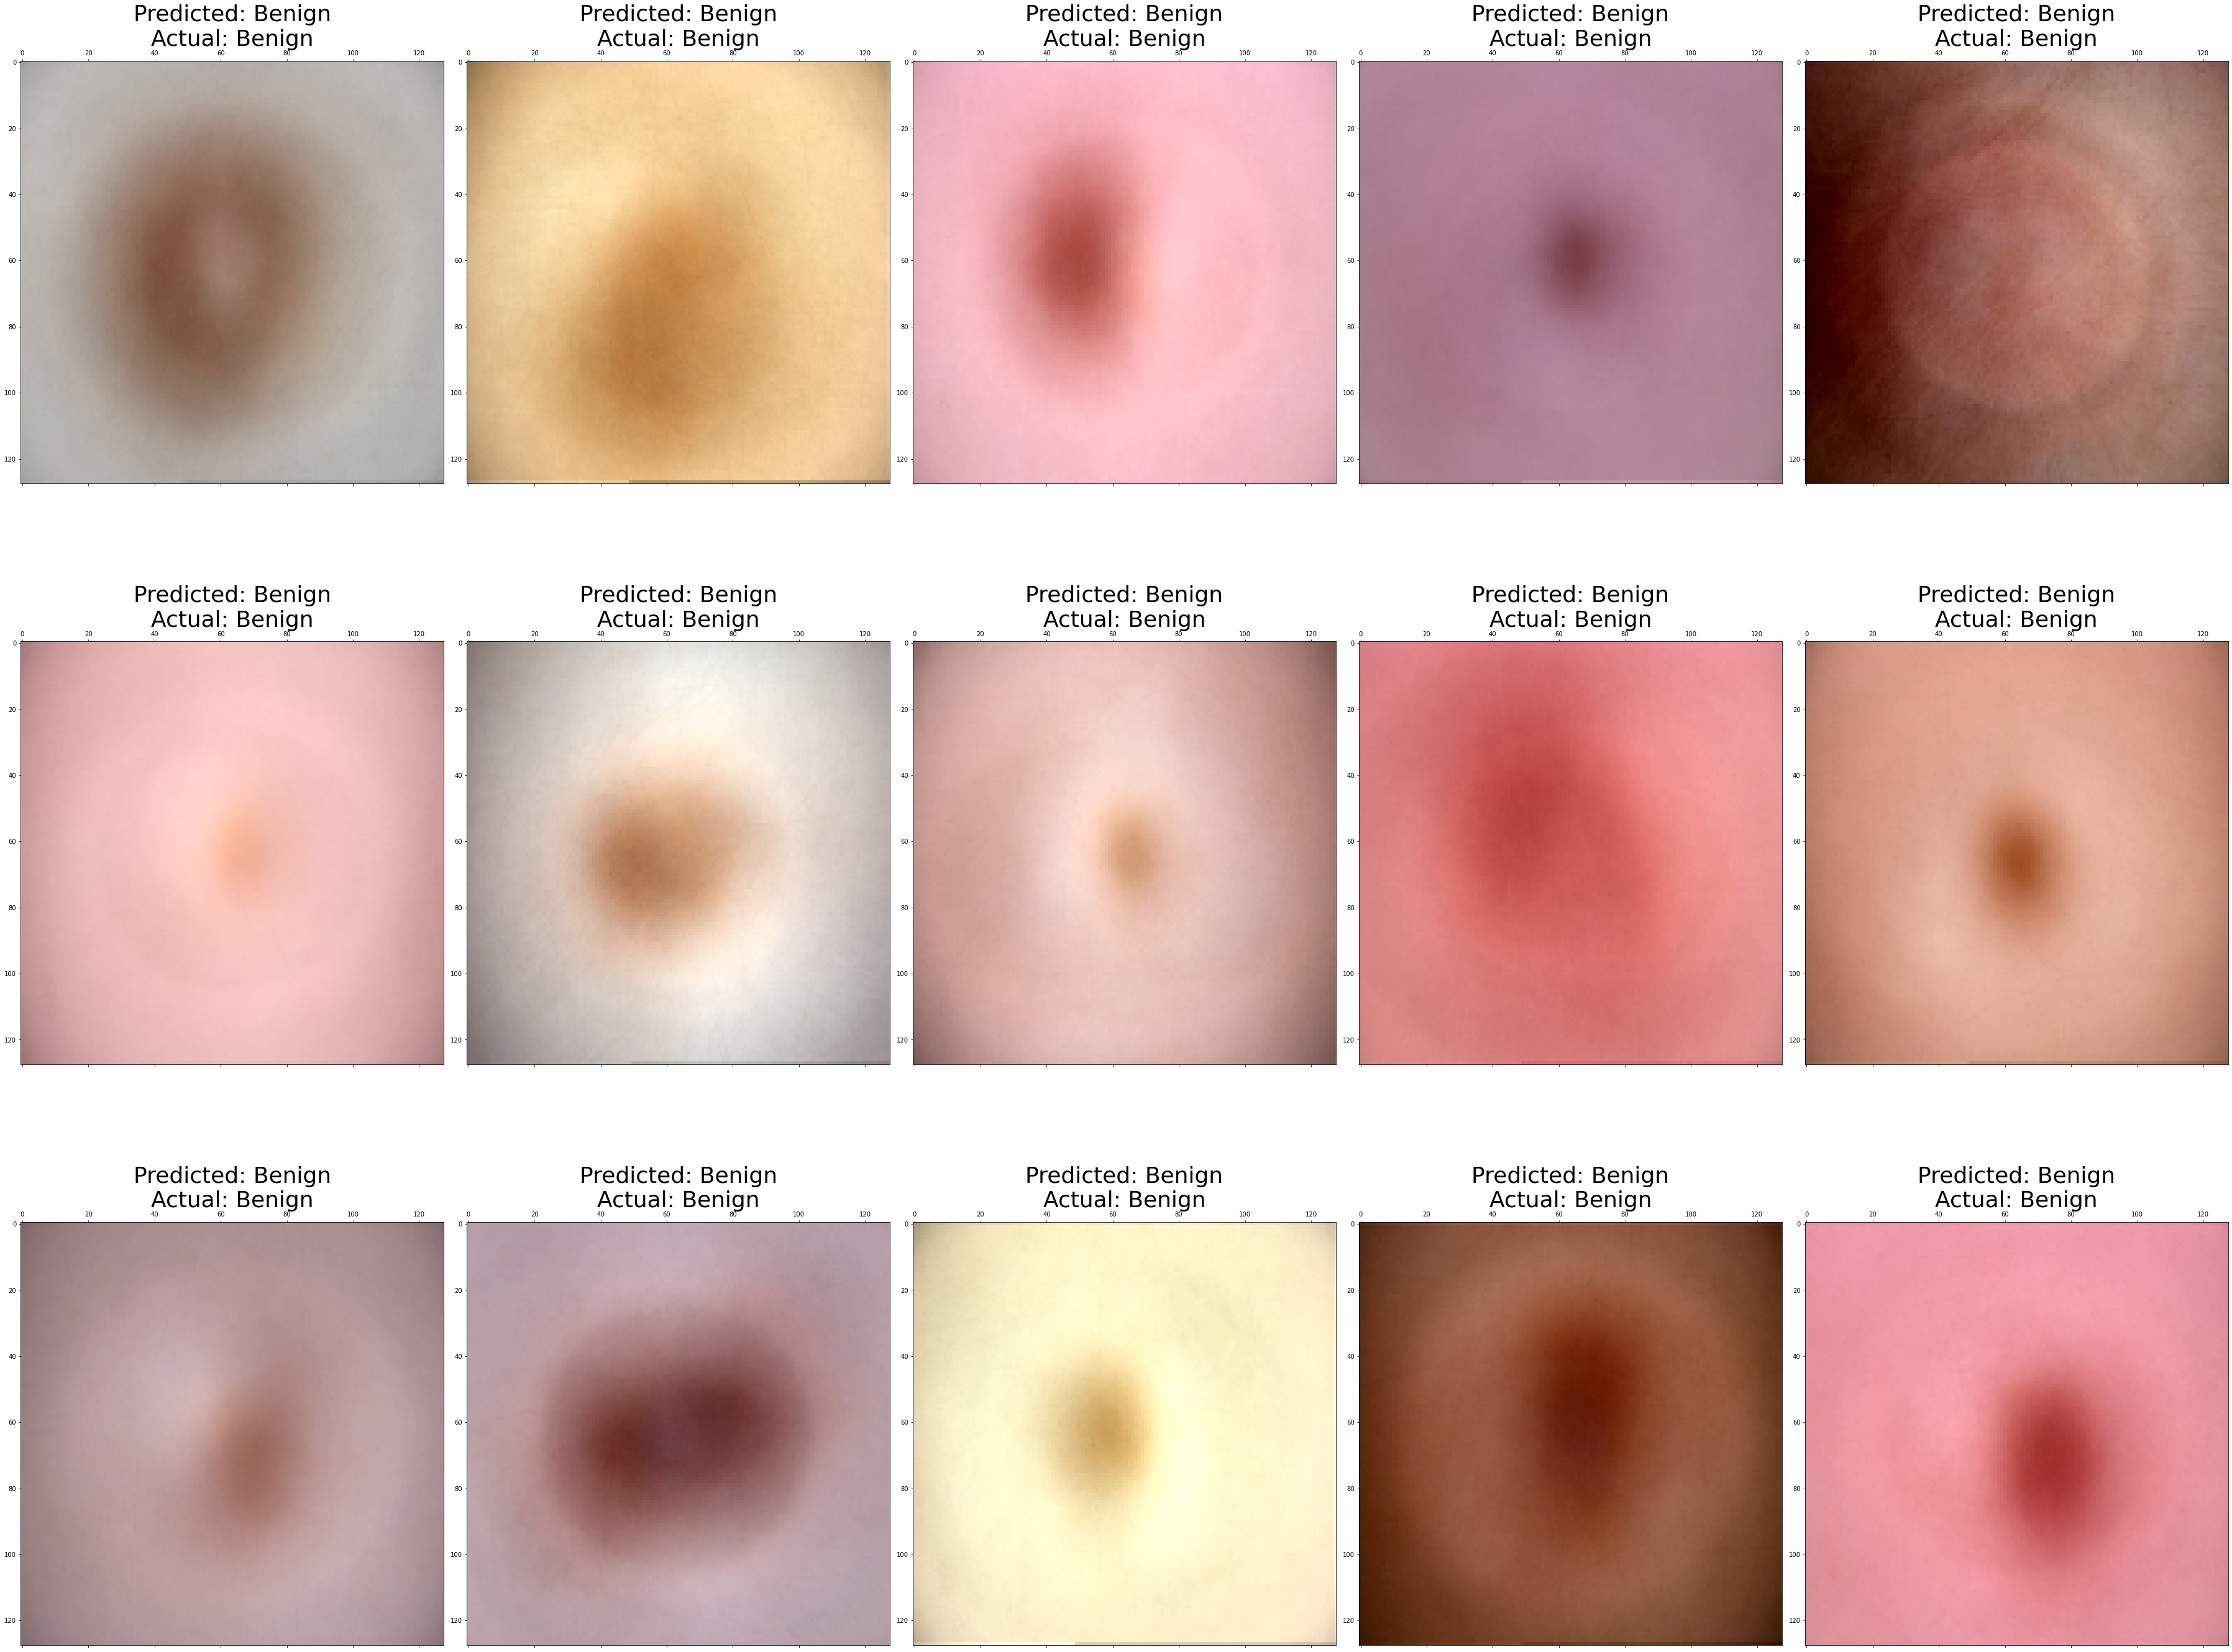

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Incorrect classification results


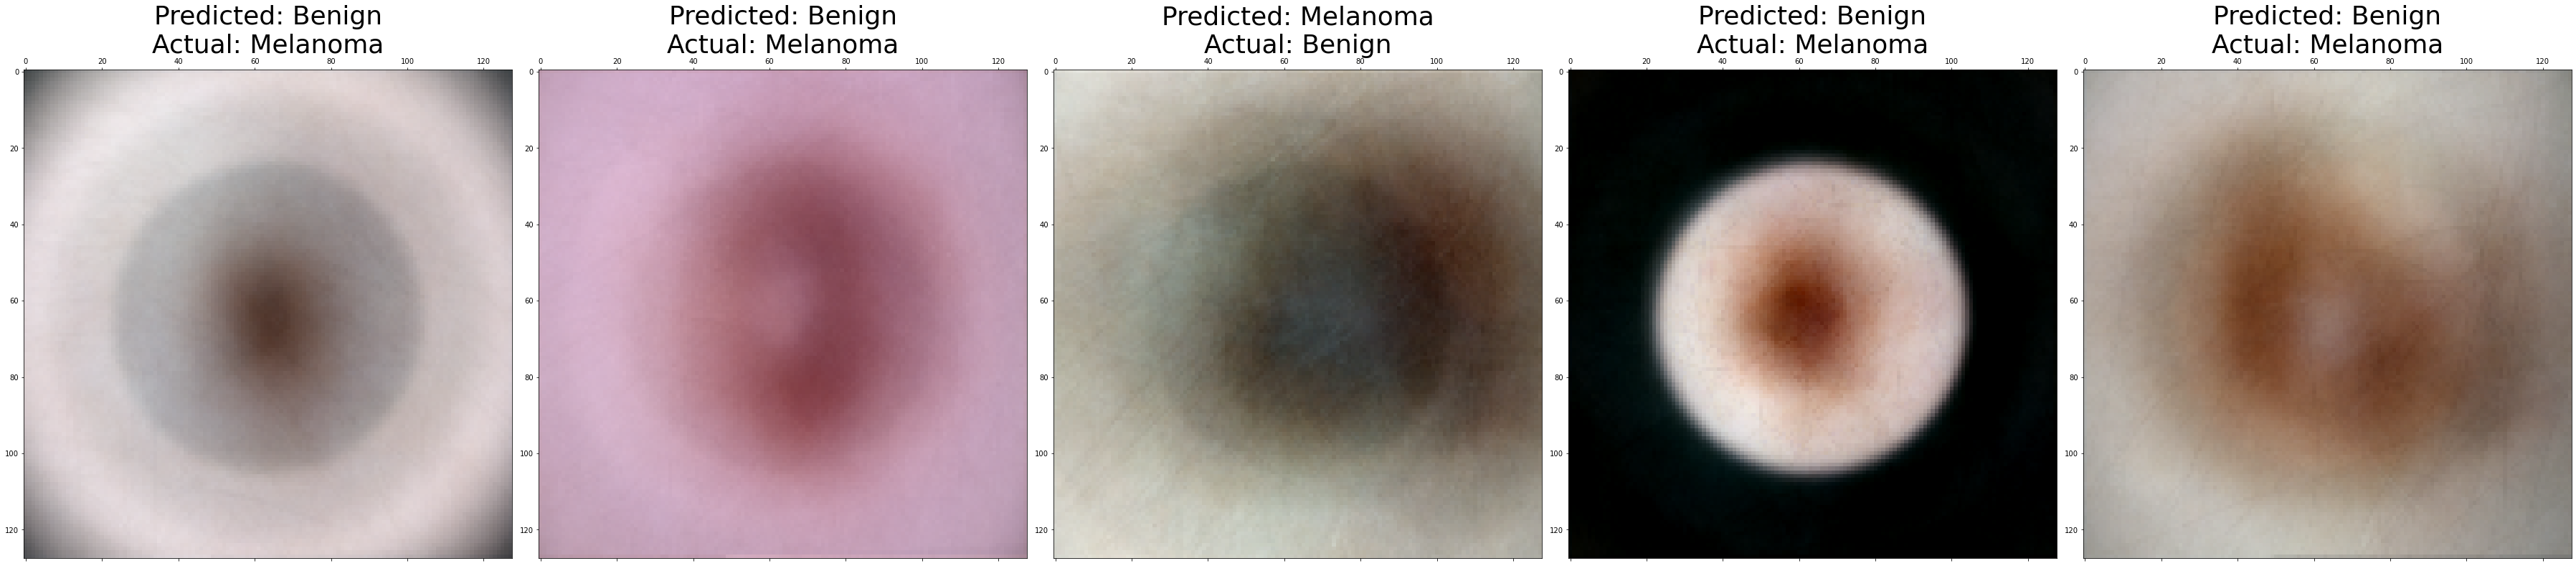

In [10]:
print("Independent Component Analysis\n")
from sklearn.decomposition import FastICA
ica = FastICA(n_components=20,max_iter = 500) 
feature_selection_prediction(ica, X_train, y_train,X_test, y_test, False) # ica does not have explained_variance_ratio_

In [11]:
print("Linear Discriminant Analysis\n")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
feature_selection_prediction(lda, X_train, y_train,X_test, y_test, inverse_transform=False)

Linear Discriminant Analysis

Method preserved information=1.0
Method loss=0.0
GridSearch best params after tuning={'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
GridSearch model after tuning=SVC(C=1000, gamma=0.01)

Classification_report=
              precision    recall  f1-score   support

           0     0.9388    0.9892    0.9634        93
           1     0.5000    0.1429    0.2222         7

    accuracy                         0.9300       100
   macro avg     0.7194    0.5661    0.5928       100
weighted avg     0.9081    0.9300    0.9115       100




In [13]:
print("Locally Linear Embedding")
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
feature_selection_prediction(embedding, X_train, y_train,X_test, y_test, False, False) # lle does not have explained_variance_ratio_

Locally Linear Embedding
GridSearch best params after tuning={'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
GridSearch model after tuning=SVC(C=0.1, gamma=1)

Classification_report=
              precision    recall  f1-score   support

           0     0.9300    1.0000    0.9637        93
           1     0.0000    0.0000    0.0000         7

    accuracy                         0.9300       100
   macro avg     0.4650    0.5000    0.4819       100
weighted avg     0.8649    0.9300    0.8963       100




/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
